# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

### load libs & data

In [28]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [29]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### clean & transform 

In [30]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [31]:
df_spaceship_cleaned = spaceship.dropna()
df_spaceship_cleaned

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [32]:
df_spaceship_cleaned['Transported'] = df_spaceship_cleaned['Transported'].astype(int)
df_spaceship_cleaned['CryoSleep'] = df_spaceship_cleaned['CryoSleep'].astype(int)

display(df_spaceship_cleaned)

C:\Users\rk-admin\AppData\Local\Temp\ipykernel_29252\245339779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spaceship_cleaned['Transported'] = df_spaceship_cleaned['Transported'].astype(int)
C:\Users\rk-admin\AppData\Local\Temp\ipykernel_29252\245339779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spaceship_cleaned['CryoSleep'] = df_spaceship_cleaned['CryoSleep'].astype(int)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [33]:
df_spaceship_model = df_spaceship_cleaned.drop(columns = ["VIP", "Cabin", "Destination", "PassengerId", "Name"])
df_spaceship_model

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...
8688,Europa,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,26.0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0


In [34]:
df_spaceship_model = pd.get_dummies(df_spaceship_model, columns=['HomePlanet'])
df_spaceship_model = df_spaceship_model.applymap(lambda x: int(x) if isinstance(x, (bool, int)) else x)
df_spaceship_model

C:\Users\rk-admin\AppData\Local\Temp\ipykernel_29252\1217474105.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_spaceship_model = df_spaceship_model.applymap(lambda x: int(x) if isinstance(x, (bool, int)) else x)


,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,0,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0
4,0,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0
8689,1,18.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
8690,0,26.0,0.0,0.0,1872.0,1.0,0.0,1,1,0,0
8691,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0


### scaling & selection

Now perform the same as before:
- Feature Scaling
- Feature Selection


In [35]:
#your code here
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [36]:
features = df_spaceship_model.drop(columns = ["Transported"])
target = df_spaceship_model["Transported"]
features

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0
4,0,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0
8689,1,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0
8690,0,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0
8691,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [38]:
normalizer = MinMaxScaler()

In [39]:
normalizer.fit(X_train)

MinMaxScaler()

In [40]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [41]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

display(X_train_norm)
display(X_test_norm)

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1.0,0.405063,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
1,1.0,0.050633,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
2,0.0,0.379747,0.000000,0.007916,0.000000,0.051276,0.000000,1.0,0.0,0.0
3,0.0,0.215190,0.001310,0.000000,0.046111,0.016378,0.000049,0.0,0.0,1.0
4,1.0,0.329114,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5279,0.0,0.670886,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
5280,0.0,0.455696,0.000000,0.000000,0.000000,0.032355,0.000098,1.0,0.0,0.0
5281,0.0,0.455696,0.000000,0.159528,0.000000,0.348893,0.004721,0.0,1.0,0.0
5282,0.0,0.430380,0.000000,0.000134,0.000000,0.030569,0.087480,0.0,1.0,0.0


,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1.0,0.632911,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,1.0
1,1.0,0.227848,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0
2,1.0,0.189873,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0
3,1.0,0.658228,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0
4,0.0,0.784810,0.000000,0.054775,0.00000,0.077740,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1317,0.0,0.240506,0.000000,0.000000,0.05468,0.000045,0.001672,1.0,0.0,0.0
1318,0.0,0.468354,0.030242,0.115185,0.00000,0.000045,0.008409,0.0,1.0,0.0
1319,0.0,0.544304,0.000202,0.178748,0.00000,0.000312,0.000000,0.0,1.0,0.0
1320,1.0,0.177215,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0


In [42]:
corr = np.abs(features.corr(method="spearman")) ## # spearman / pearson? method="spearman"
corr

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
CryoSleep,1.000000,0.090870,0.521965,0.534120,0.519757,0.554971,0.534122,0.107303,0.097172,0.027704
Age,0.090870,1.000000,0.132855,0.206145,0.112964,0.208032,0.183614,0.236871,0.250315,0.022719
RoomService,0.521965,0.132855,1.000000,0.175702,0.442219,0.253528,0.176385,0.033908,0.209185,0.266274
FoodCourt,0.534120,0.206145,0.175702,1.000000,0.184632,0.478645,0.510008,0.069993,0.285131,0.219968
ShoppingMall,0.519757,0.112964,0.442219,0.184632,1.000000,0.256929,0.197898,0.014319,0.194956,0.191665
Spa,0.554971,0.208032,0.253528,0.478645,0.256929,1.000000,0.434082,0.066951,0.176359,0.106946
VRDeck,0.534122,0.183614,0.176385,0.510008,0.197898,0.434082,1.000000,0.012459,0.208773,0.208785
HomePlanet_Earth,0.107303,0.236871,0.033908,0.069993,0.014319,0.066951,0.012459,1.000000,0.630734,0.553240
HomePlanet_Europa,0.097172,0.250315,0.209185,0.285131,0.194956,0.176359,0.208773,0.630734,1.000000,0.297476
HomePlanet_Mars,0.027704,0.022719,0.266274,0.219968,0.191665,0.106946,0.208785,0.553240,0.297476,1.000000


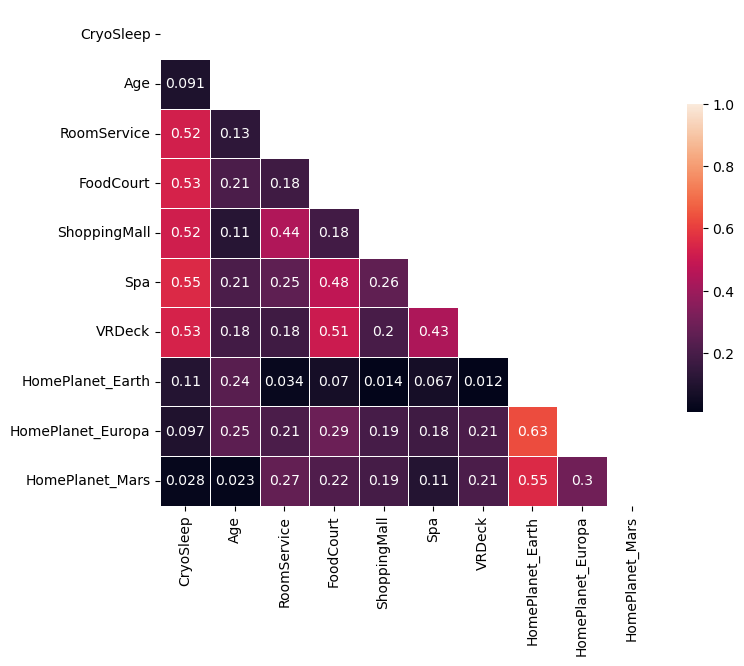

In [43]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### vizz

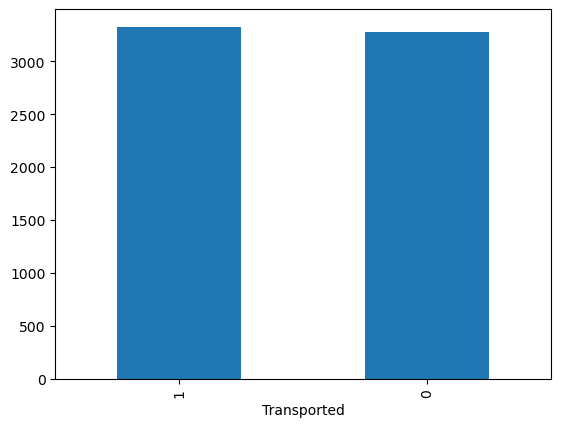

In [106]:
transported = df_spaceship_model["Transported"].value_counts()
transported.plot(kind="bar")
plt.show()

### apply random forest // best model so far 

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [44]:
#your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=150,
                             max_depth=3)

In [45]:
forest.fit(X_train_norm, y_train)

RandomForestClassifier(max_depth=3, n_estimators=150)

- Evaluate your model

In [46]:
#your code here
pred_forest = forest.predict(X_train)
print("the accuracy score for train data // ForestClassifier is", accuracy_score(y_train, pred_forest))

pred_forest = forest.predict(X_test)
print("the accuracy score for test data // ForestClassifier is", accuracy_score(y_test, pred_forest))

the accuracy score for train data // ForestClassifier is 0.7445117335352006
the accuracy score for test data // ForestClassifier is 0.7360060514372163


### hypterparameter tuning

**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [122]:
#your code here
grid = {"n_estimators": [50, 100, 400, 800],
        "max_leaf_nodes": [25, 50, 250, 500, None],
        "max_depth":[5, 10, 15, 20]}


In [123]:
forest = RandomForestClassifier()

In [125]:
model = GridSearchCV(estimator = forest, param_grid = grid, cv=5, verbose=5)

- Run Grid Search

In [127]:
model.fit(X_train_norm, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END max_depth=5, max_leaf_nodes=25, n_estimators=50;, score=0.783 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=25, n_estimators=50;, score=0.804 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=25, n_estimators=50;, score=0.782 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=25, n_estimators=50;, score=0.777 total time=   0.1s
[CV 5/5] END max_depth=5, max_leaf_nodes=25, n_estimators=50;, score=0.790 total time=   0.1s
[CV 1/5] END max_depth=5, max_leaf_nodes=25, n_estimators=100;, score=0.790 total time=   0.2s
[CV 2/5] END max_depth=5, max_leaf_nodes=25, n_estimators=100;, score=0.808 total time=   0.2s
[CV 3/5] END max_depth=5, max_leaf_nodes=25, n_estimators=100;, score=0.787 total time=   0.2s
[CV 4/5] END max_depth=5, max_leaf_nodes=25, n_estimators=100;, score=0.777 total time=   0.3s
[CV 5/5] END max_depth=5, max_leaf_nodes=25, n_estimators=100;, score=0.781 total time= 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [25, 50, 250, 500, None],
                         'n_estimators': [50, 100, 400, 800]},
             verbose=5)

- Evaluate your model

In [128]:
model.best_params_

{'max_depth': 15, 'max_leaf_nodes': 50, 'n_estimators': 50}

In [129]:
best_model = model.best_estimator_
best_model

RandomForestClassifier(max_depth=15, max_leaf_nodes=50, n_estimators=50)

In [130]:
best_model.fit(X_train_norm, y_train)

RandomForestClassifier(max_depth=15, max_leaf_nodes=50, n_estimators=50)

In [131]:
pred_forest = best_model.predict(X_train)
print("the accuracy score for train data // ForestClassifier/Gridsearch is", accuracy_score(y_train, pred_forest))

pred_forest = best_model.predict(X_test)
print("the accuracy score for test data // ForestClassifier/Gridsearch is", accuracy_score(y_test, pred_forest))

the accuracy score for train data // ForestClassifier/Gridsearch is 0.7227479182437547
the accuracy score for test data // ForestClassifier/Gridsearch is 0.7231467473524962
